In [2]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib import cm
# from datetime import datetime
import glob
# import os
import json
# import pickle
# import six
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.options.mode.chained_assignment = None

In [3]:
AllCSV = [i for i in glob.glob('C:/Users/alowa/Downloads/archive/*.{}'.format('csv'))]
AllCSV

['C:/Users/alowa/Downloads/archive\\CAvideos.csv',
 'C:/Users/alowa/Downloads/archive\\DEvideos.csv',
 'C:/Users/alowa/Downloads/archive\\FRvideos.csv',
 'C:/Users/alowa/Downloads/archive\\GBvideos.csv',
 'C:/Users/alowa/Downloads/archive\\INvideos.csv',
 'C:/Users/alowa/Downloads/archive\\JPvideos.csv',
 'C:/Users/alowa/Downloads/archive\\KRvideos.csv',
 'C:/Users/alowa/Downloads/archive\\MXvideos.csv',
 'C:/Users/alowa/Downloads/archive\\RUvideos.csv',
 'C:/Users/alowa/Downloads/archive\\USvideos.csv']

In [4]:
all_dataframes = [] # list to store each data frame separately
for csv in AllCSV:
    df = pd.read_csv(csv,encoding='latin-1')
    df['country'] = csv[33:35] # adding column 'country' so that each dataset could be identified uniquely
    all_dataframes.append(df)
all_dataframes[0].head() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [5]:
all_dataframes[0].dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [6]:
for df in all_dataframes:
    # video_id 
    df['video_id'] = df['video_id'].astype('str') 
    
    # trending date
    df['trending_date'] = df['trending_date'].astype('str') 
    date_pieces = (df['trending_date']
                   .str.split('.')
                  )
    df['Year'] = date_pieces.str[0].astype(int)
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)
    updatedyear = []
    for i in range(len(df)) : 
        y = df.loc[i, "Year"]
        newy = y+2000
        updatedyear.append(newy)
    for i in range(len(df)):
        newy = updatedyear[i]
        tr = df.loc[i, "Year"]
        df['Year'].replace(to_replace = tr, value = newy, inplace=True)
    del df['trending_date']
    df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
    del df['Year']
    del df['Day']
    del df['Month']
    
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channel_title'] = df['channel_title'].astype('str')
    #category_id
    df['category_id'] = df['category_id'].astype(str) 
    
    #tags
    df['tags'] = df['tags'].astype('str')
    
    # views, likes, dislikes, comment_count are already in correct data types i.e int64
    
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    
    #description
    df['description'] = df['description'].astype('str')
    
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
    df['comments_disabled'] = df['comments_disabled'].astype('category') 
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 
    
    # publish_time 
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [7]:
all_dataframes[0].dtypes

video_id                          object
title                             object
channel_title                     object
category_id                       object
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [8]:
all_dataframes[0].head()

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,2017-11-14
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-14
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,2017-11-14
3,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-14
4,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,2017-11-14


In [9]:
for df in all_dataframes:
    df.insert(4, 'publish_date', df['publish_time'].dt.date) # loc, column name, values for column to be inserted
    df['publish_time'] = df['publish_time'].dt.time
# Changing data type for 'publish_date' from object to 'datetime64[ns]'
for df in all_dataframes:
     df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [10]:
all_dataframes[1].dtypes

video_id                          object
title                             object
channel_title                     object
category_id                       object
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [11]:
all_dataframes[0].head()

,video_id,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,2017-11-14
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-14
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,2017-11-14
3,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-14
4,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,2017-11-14


In [12]:
for df in all_dataframes:
    df.set_index('video_id', inplace=True)

In [13]:
all_dataframes[0].head()

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,
n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,2017-11-14
0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-14
5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,2017-11-14
d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-14
2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,2017-11-14


In [14]:
for i in all_dataframes:
    print(i.isnull().sum())


title                     0
channel_title             0
category_id               0
publish_date              0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
trending_date             0
dtype: int64
title                     0
channel_title             0
category_id               0
publish_date              0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
trending_date             0
dtype: int64
title                 

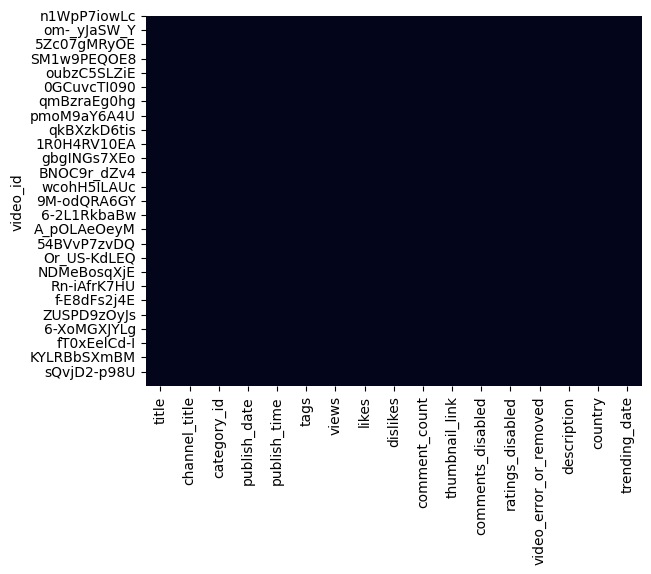

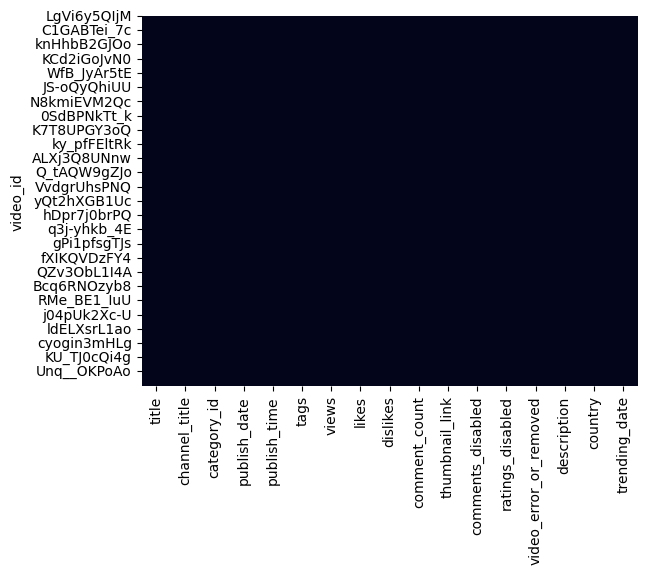

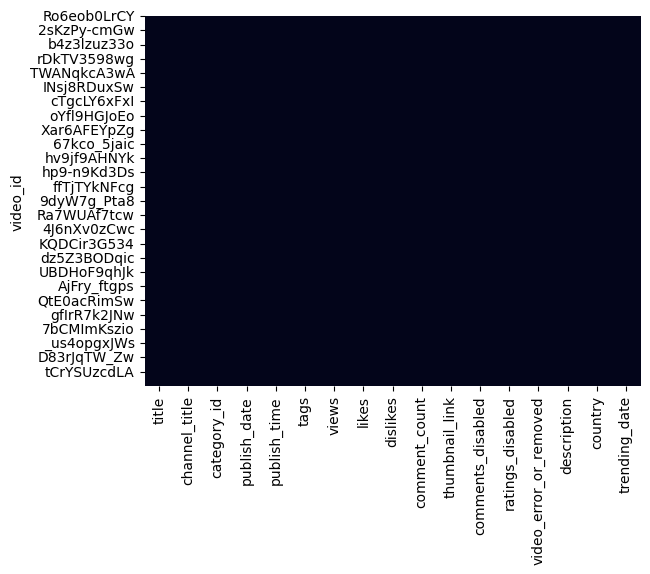

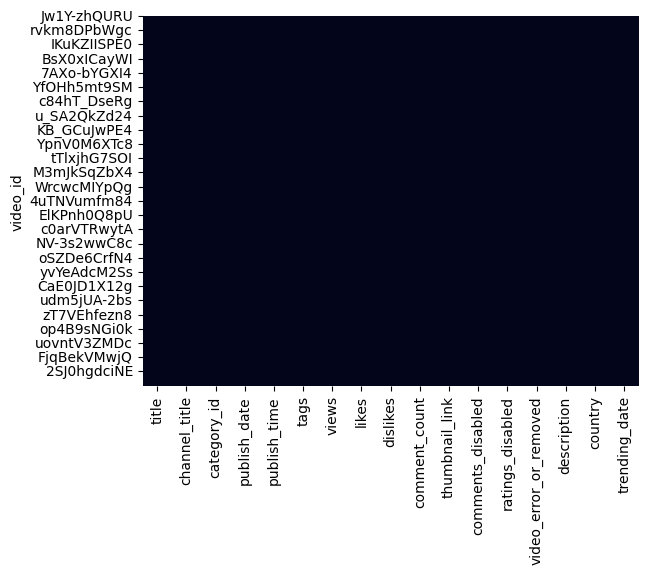

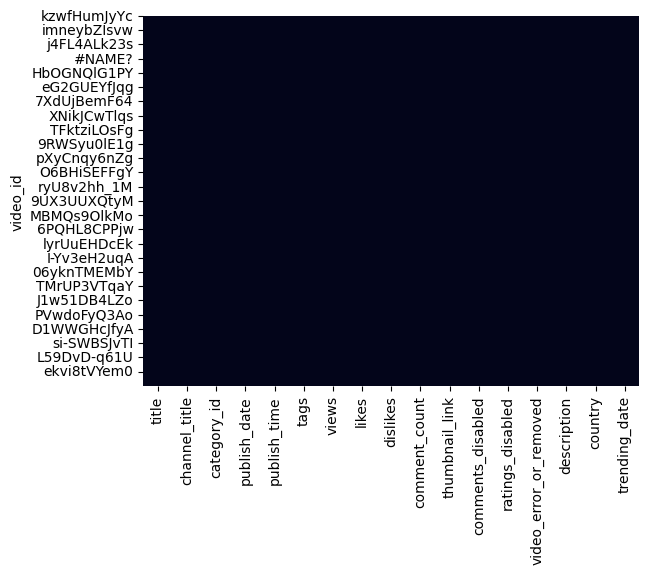

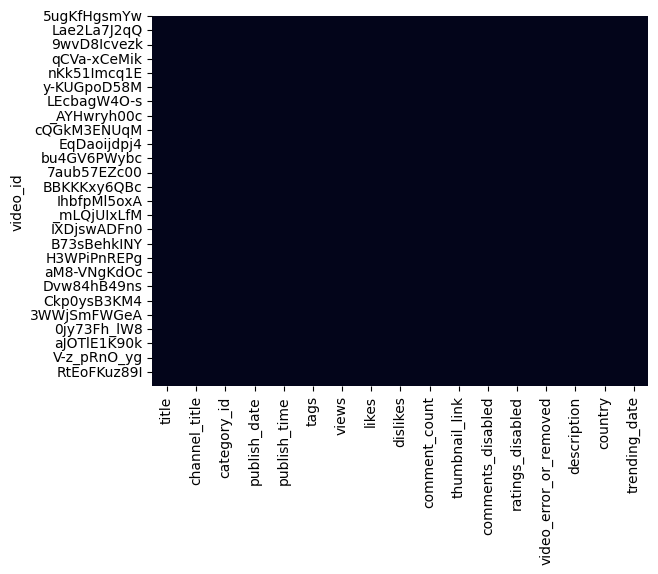

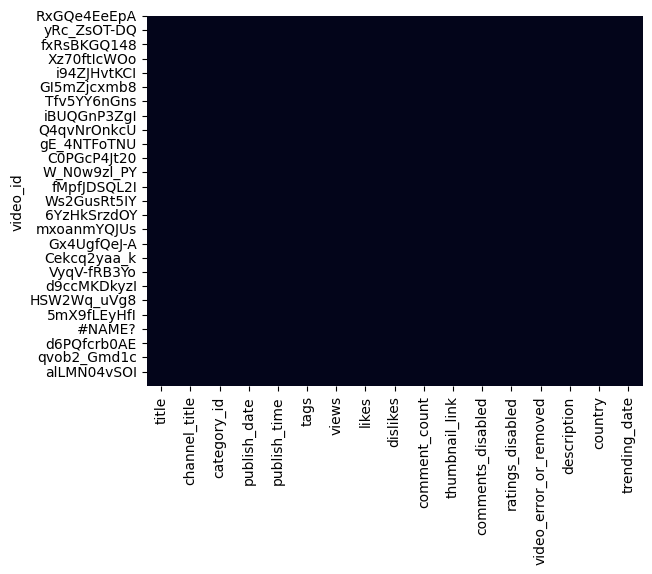

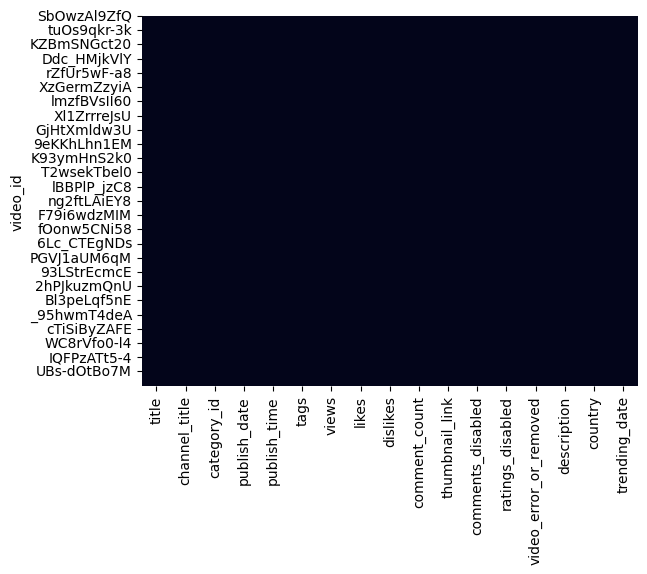

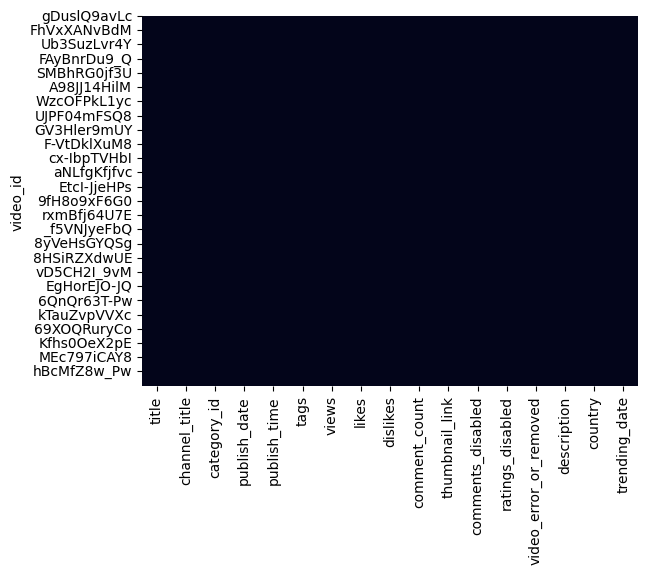

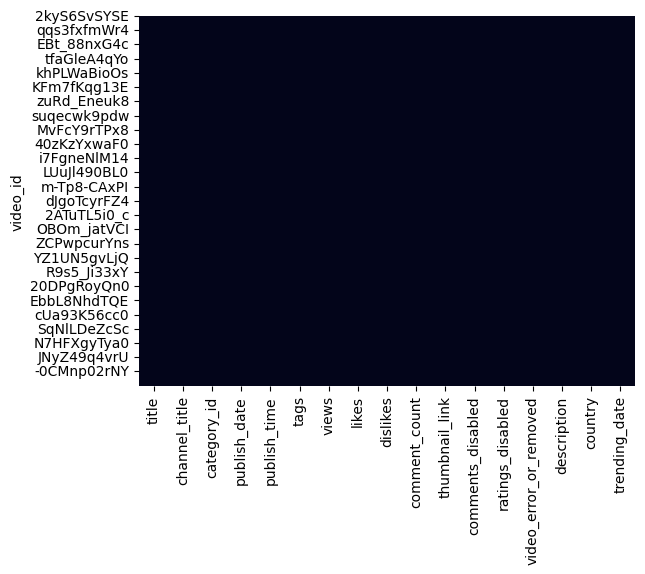

<Figure size 640x480 with 0 Axes>

In [15]:
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [16]:
combined_df = pd.concat(all_dataframes)

In [17]:
combined_df.head()

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,
n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,2017-11-14
0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-14
5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,2017-11-14
d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-14
2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,2017-11-14


In [18]:
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')
for df in all_dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

In [19]:
combined_df[['publish_date','publish_time','trending_date', 'country']].head()

,publish_date,publish_time,trending_date,country
video_id,,,,
ooyjaVdt-jA,2018-05-17,17:09:38,2018-06-14,US
NXwn1iUbbJU,2018-06-13,20:13:30,2018-06-14,FR
AN2KspjYRLc,2018-06-12,15:07:36,2018-06-14,FR
WGKOBMZAwuM,2018-06-13,07:00:05,2018-06-14,FR
zauQhWWpa0s,2018-06-13,23:34:13,2018-06-14,FR


In [20]:
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')
# Doing the same above operation for each of the individual dataframes in the list we created earlier
for df in all_dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Printing results
combined_df[['publish_date','publish_time','trending_date', 'country']].head()
# It can be seen that latest publications and trending information is at the top now

,publish_date,publish_time,trending_date,country
video_id,,,,
ooyjaVdt-jA,2018-05-17,17:09:38,2018-06-14,US
hgjIv1RND5c,2018-06-12,18:34:29,2018-06-14,KR
Tq1O_BGD_bg,2018-06-11,13:26:03,2018-06-14,KR
bcIiRjge8VQ,2018-06-12,08:58:00,2018-06-14,KR
HNaK-_avSJA,2018-06-11,23:54:05,2018-06-14,KR


In [21]:
with open ('C:/Users/alowa/Downloads/archive/US_category_id.json','r') as f:
    data=f.read()
obj = json.loads(data)
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [22]:
category_id = {}
with open('C:/Users/alowa/Downloads/archive/DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))
for df in all_dataframes:
    df.insert(2, 'category', df['category_id'].map(category_id))
# Printing cleaned combined dataframe
combined_df.head(3)

,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,,
ooyjaVdt-jA,Official Call of DutyÂ®: Black Ops 4 âÂ Mult...,Call of Duty,Gaming,20,2018-05-17,17:09:38,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US,2018-06-14
hgjIv1RND5c,ì´ë¬ì ìë  yyxy (LOONA/yyxy) - love4eva ...,ë³´ììì§ê°,Entertainment,24,2018-06-12,18:34:29,"LOONA|""love4eva live stage compilation""|""LOONA...",46243,3117,17,218,https://i.ytimg.com/vi/hgjIv1RND5c/default.jpg,False,False,False,ì»¤ë¯¸ì  ë¬¸ì : https://open.kakao.com/o/sl...,KR,2018-06-14
Tq1O_BGD_bg,ì² êµ¬ê° ì¬ê¸¸ ì ë¹¨ì? ì§ê²íë ì§í,ì¸ì§í (OzilTube),Comedy,23,2018-06-11,13:26:03,"ì² êµ¬|""BJ""|""BJì² êµ¬""|""ìíë¦¬ì¹´ì² êµ¬""|""a...",220977,1108,175,409,https://i.ytimg.com/vi/Tq1O_BGD_bg/default.jpg,False,False,False,â¶êµ¬ë +ì¢ìì+ê³µì ! ìâ¥ì¸ì§ë ì§...,KR,2018-06-14


In [23]:
combined_df['category'].unique()

array(['Gaming', 'Entertainment', 'Comedy', 'Education', 'Sports',
       'Howto & Style', 'People & Blogs', 'Pets & Animals',
       'News & Politics', 'Music', 'Film & Animation',
       'Science & Technology', nan, 'Travel & Events', 'Autos & Vehicles',
       'Shows', 'Movies', 'Trailers'], dtype=object)

In [24]:
combined_df.groupby('category').sum('likes')

,views,likes,dislikes,comment_count
category,,,,
Autos & Vehicles,660783633,25394337,1416337,3150405
Comedy,4573395735,218752101,11303107,23294928
Education,588975602,21696410,921721,2965060
Entertainment,17588684816,471875235,32881878,68370734
Film & Animation,3176675674,63725021,3403145,7991519
Gaming,1418177258,62702473,2742703,10055668
Howto & Style,2215631503,77250720,2919874,11088051
Movies,8053865,83781,5373,5146
Music,18175188197,444810358,21075069,36232011


In [25]:
total_likes=combined_df.groupby('category')['likes'].agg('sum')
total_likes

category
Autos & Vehicles         25394337
Comedy                  218752101
Education                21696410
Entertainment           471875235
Film & Animation         63725021
Gaming                   62702473
Howto & Style            77250720
Movies                      83781
Music                   444810358
News & Politics          53466715
People & Blogs          157767404
Pets & Animals           11473033
Science & Technology     51720085
Shows                     1244205
Sports                   71723332
Trailers                      141
Travel & Events           4373637
Name: likes, dtype: int64

In [26]:
total_dislikes=combined_df.groupby('category')['dislikes'].agg('sum')
total_dislikes

category
Autos & Vehicles         1416337
Comedy                  11303107
Education                 921721
Entertainment           32881878
Film & Animation         3403145
Gaming                   2742703
Howto & Style            2919874
Movies                      5373
Music                   21075069
News & Politics         12014537
People & Blogs          15678967
Pets & Animals            324551
Science & Technology     2554482
Shows                     278322
Sports                   3766906
Trailers                       9
Travel & Events           230007
Name: dislikes, dtype: int64

In [27]:
ratio=total_likes/total_dislikes
ratio

category
Autos & Vehicles        17.929587
Comedy                  19.353272
Education               23.539021
Entertainment           14.350617
Film & Animation        18.725332
Gaming                  22.861561
Howto & Style           26.456868
Movies                  15.592965
Music                   21.105998
News & Politics          4.450169
People & Blogs          10.062360
Pets & Animals          35.350478
Science & Technology    20.246800
Shows                    4.470380
Sports                  19.040383
Trailers                15.666667
Travel & Events         19.015234
dtype: float64

In [28]:
ratio = ratio.sort_values(ascending=False).reset_index()
ratio

,category,0
0,Pets & Animals,35.350478
1,Howto & Style,26.456868
2,Education,23.539021
3,Gaming,22.861561
4,Music,21.105998
5,Science & Technology,20.246800
6,Comedy,19.353272
7,Sports,19.040383
8,Travel & Events,19.015234
9,Film & Animation,18.725332


In [29]:
ratio.columns=['category','ratio']

<Axes: xlabel='ratio', ylabel='category'>

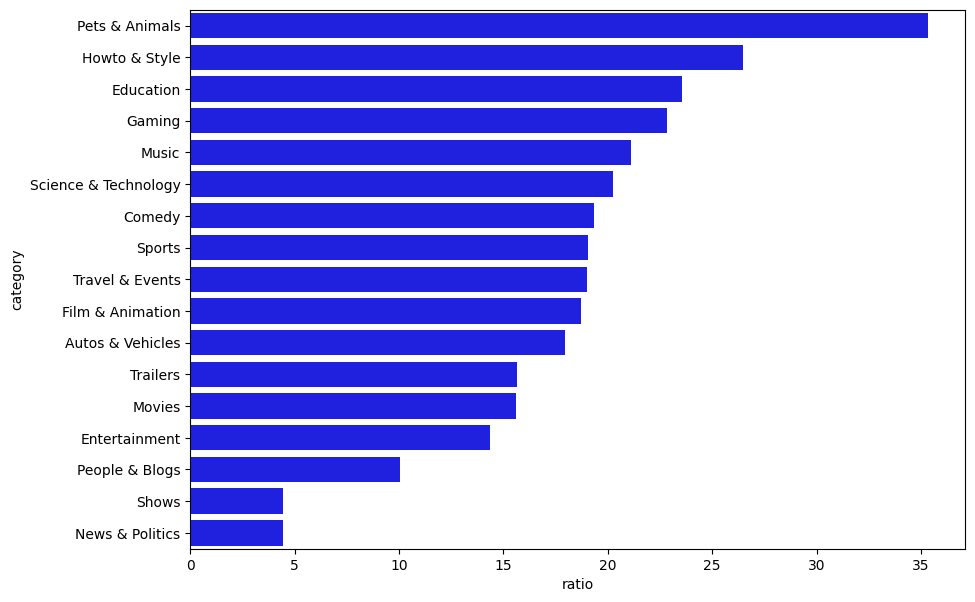

In [30]:
plt.subplots(figsize =(10, 7))
sns.barplot(x='ratio',y='category',data=ratio,label="Likes-Dislikes Ratio", color="b")

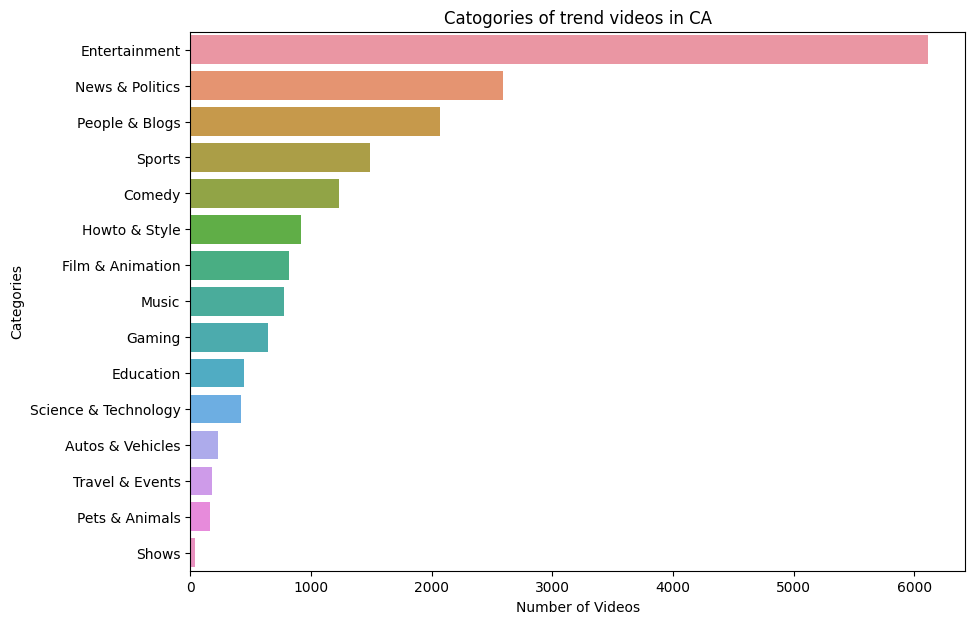

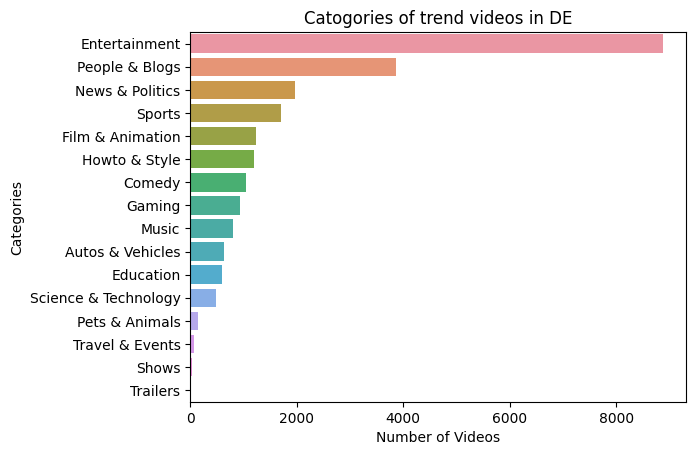

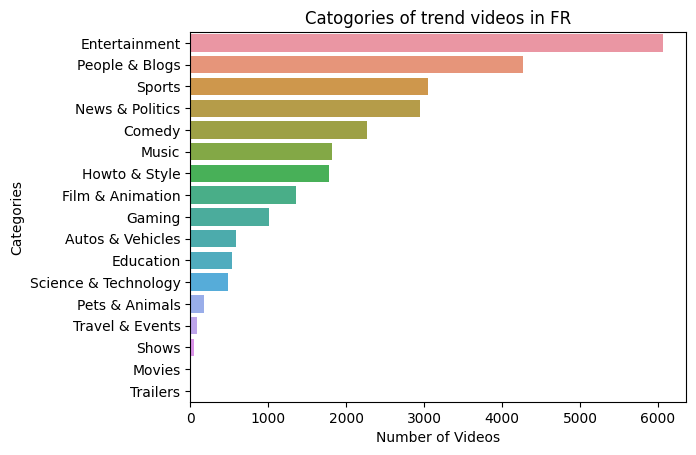

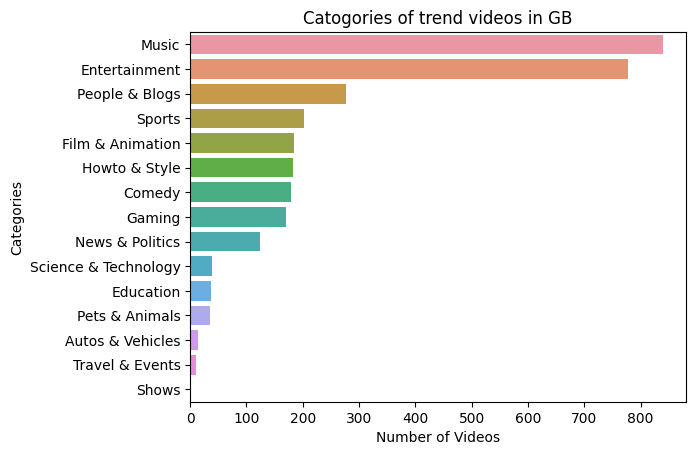

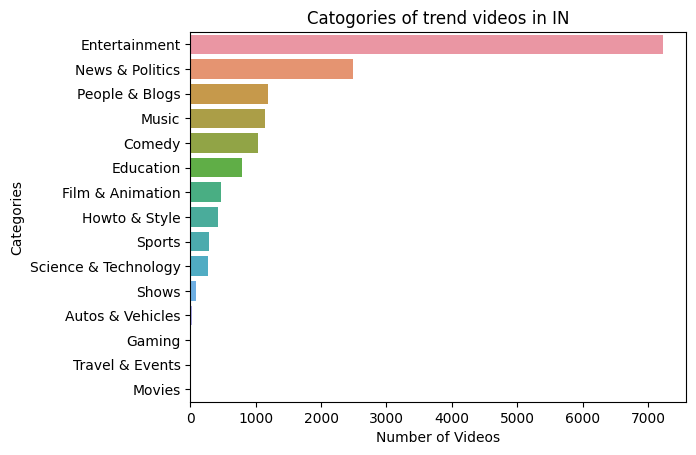

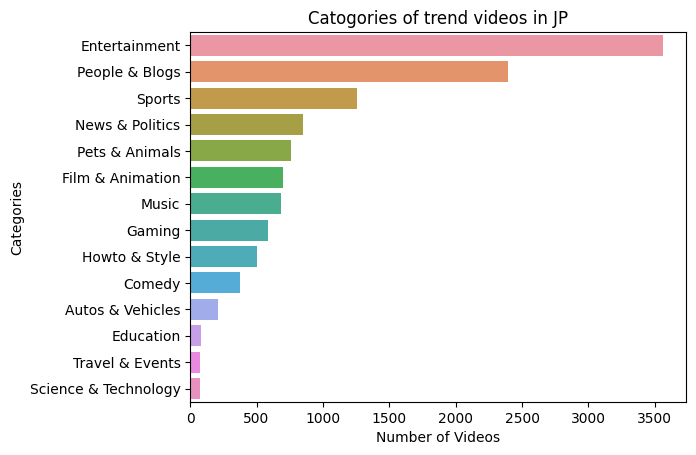

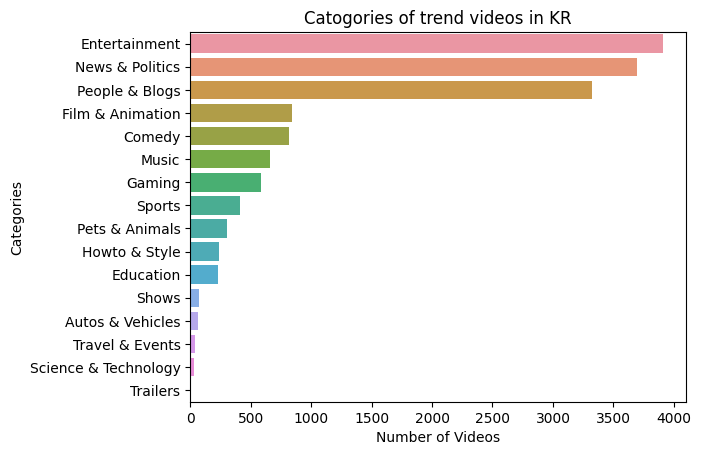

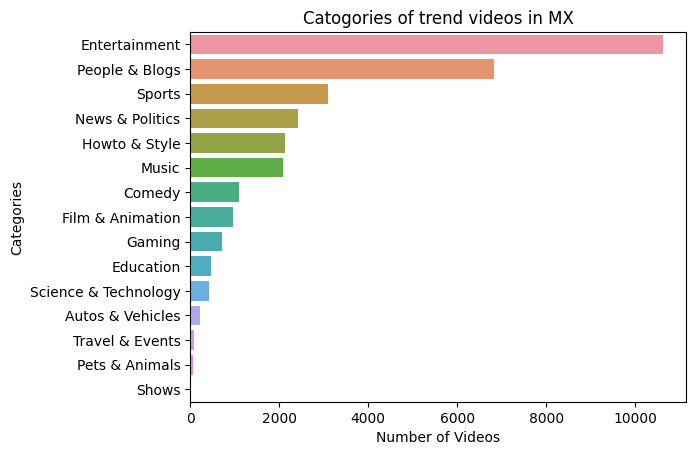

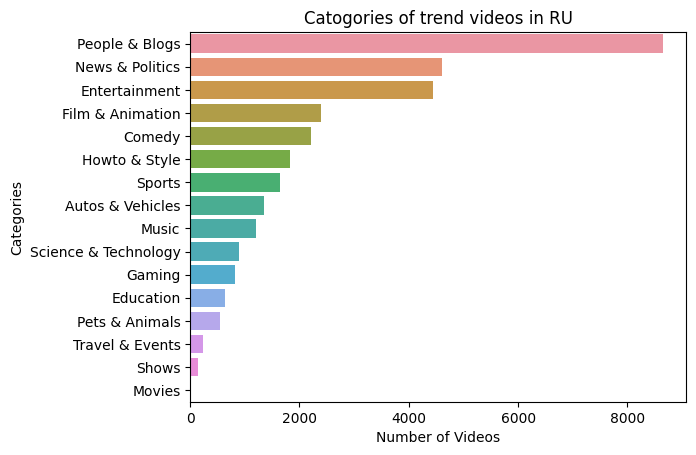

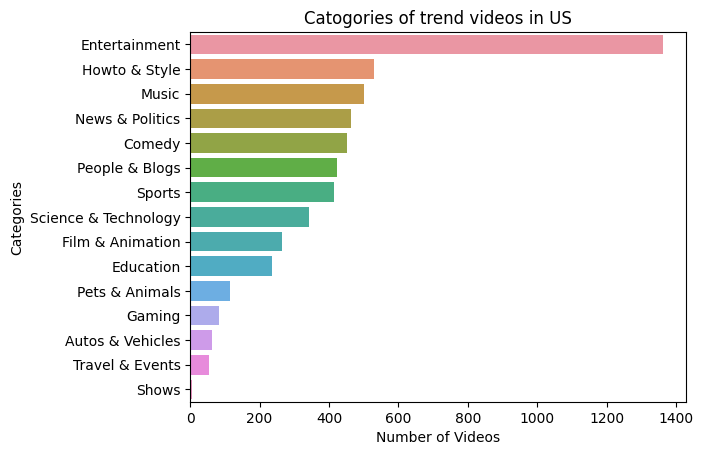

<Figure size 640x480 with 0 Axes>

In [31]:
# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('C:/Users/alowa/Downloads/archive/*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[33:35]
    countries.append(c)

plt.subplots(figsize =(10, 7))
for country in enumerate(countries):
    if countries[0]!=10:
        tempdf = combined_df[combined_df['country']==country[1]]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country[1])
        plt.figure()
    

In [32]:
tempr=[]
temp = []
for df in all_dataframes:
    temp=df
    temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    tempr.append(temp)

tempr[1][['title','views','country']].head()

,title,views,country
video_id,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,DE
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,80360459,DE
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,73463137,DE
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,73432600,DE
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,50896717,DE


In [86]:
temporary = []
for data in all_dataframes:
    temp = data
    temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
temporary[1].head()

,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date,timespan
video_id,,,,,,,,,,,,,,,,,,,
LgVi6y5QIjM,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,Entertainment,24,2017-11-13,17:08:49,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,DE,2017-11-14,1
Bayt7uQith4,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,Comedy,23,2017-11-12,22:30:01,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,DE,2017-11-14,2
1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",DE,2017-11-14,1
AHtypnRk7JE,Das Fermi-Paradoxon,100SekundenPhysik,Education,27,2017-11-12,15:00:01,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,âºAlle Videos: http://bit.ly/1fa7Tw3\n\n\nâ...,DE,2017-11-14,2
ZJ9We4bjcg0,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,Entertainment,24,2017-11-12,13:10:36,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup Ã¼ber den (verÃ¤nderten) Beat v...,DE,2017-11-14,2


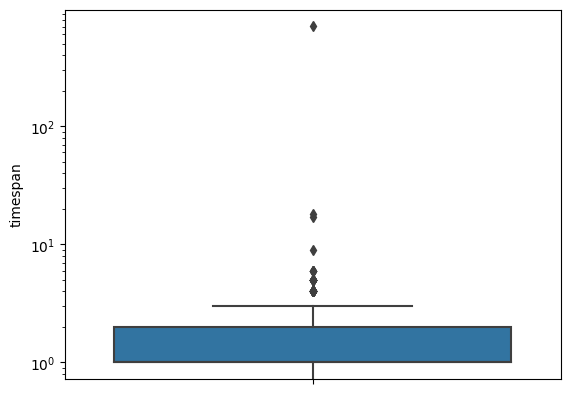

C:\Users\alowa\AppData\Local\Temp\ipykernel_5764\2275980647.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(to_trending.value_counts(),bins='rice',kde=False)


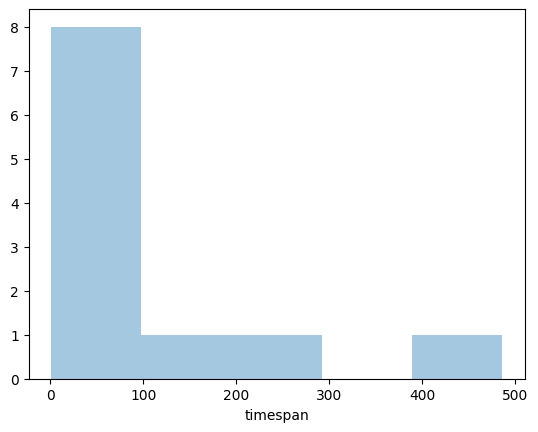

In [115]:
# Calculating days between publish and trending date
temporary = []
for data in all_dataframes:
    temp = data
    temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
# Plotting
to_trending = temporary[0].sample(1000).groupby('video_id').timespan.max() # CA
sns_ax = sns.boxplot(y = to_trending)
_ = sns_ax.set(yscale = "log")
plt.show()
_ = sns.distplot(to_trending.value_counts(),bins='rice',kde=False)

In [116]:
all_dataframes[0].head()

,video_id,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date,timespan
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,Music,10,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,2017-11-14,4
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,2017-11-13,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-14,1
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,2017-11-14,2
3,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-14,2
4,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,10,2017-11-09,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,2017-11-14,5


In [124]:
tempe = combined_df
tempe = tempe.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
tempe = tempe.sort_values(by='likes', ascending=False).head()
tempe

C:\Users\alowa\AppData\Local\Temp\ipykernel_5764\1614968293.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tempe = tempe.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())


,views,likes
category,,
Entertainment,17588684816,471875235
Music,18175188197,444810358
Comedy,4573395735,218752101
People & Blogs,5606737191,157767404
Howto & Style,2215631503,77250720
